In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas_datareader.data as data
import datetime
import yfinance as yf


In [2]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2023, 1, 31)


df = yf.download('AAPL',start, end)
df = df.reset_index()
df = df.drop(['Date','Adj Close'], axis = 1)

[*********************100%***********************]  1 of 1 completed


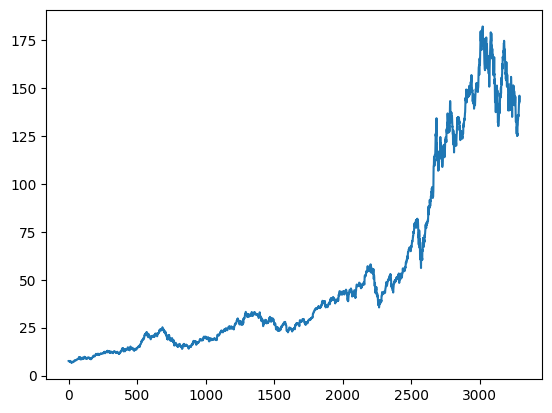

In [3]:
plt.plot(df.Close)

In [4]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3286    143.702199
3287    143.548599
3288    143.408599
3289    143.309799
3290    143.194499
Name: Close, Length: 3291, dtype: float64

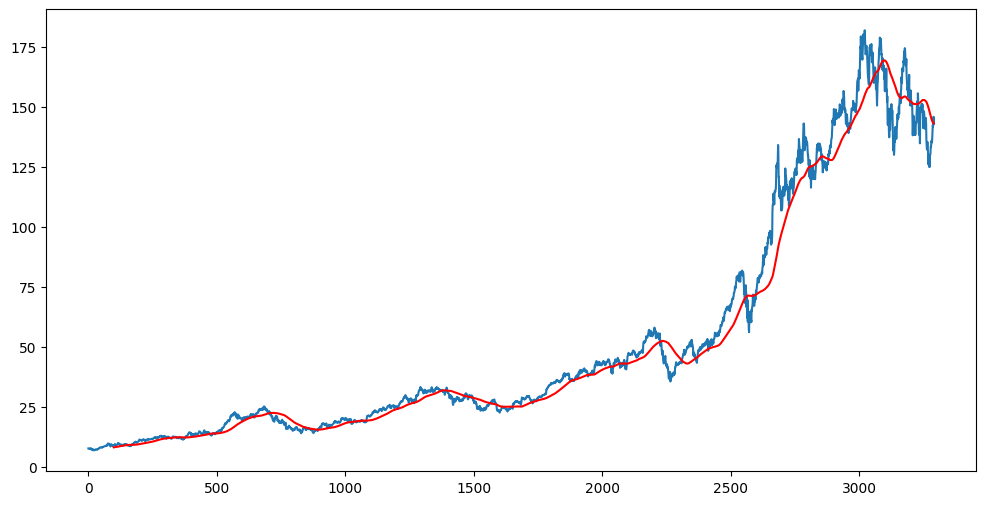

In [5]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [6]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3286    148.67180
3287    148.52040
3288    148.38975
3289    148.29065
3290    148.16735
Name: Close, Length: 3291, dtype: float64

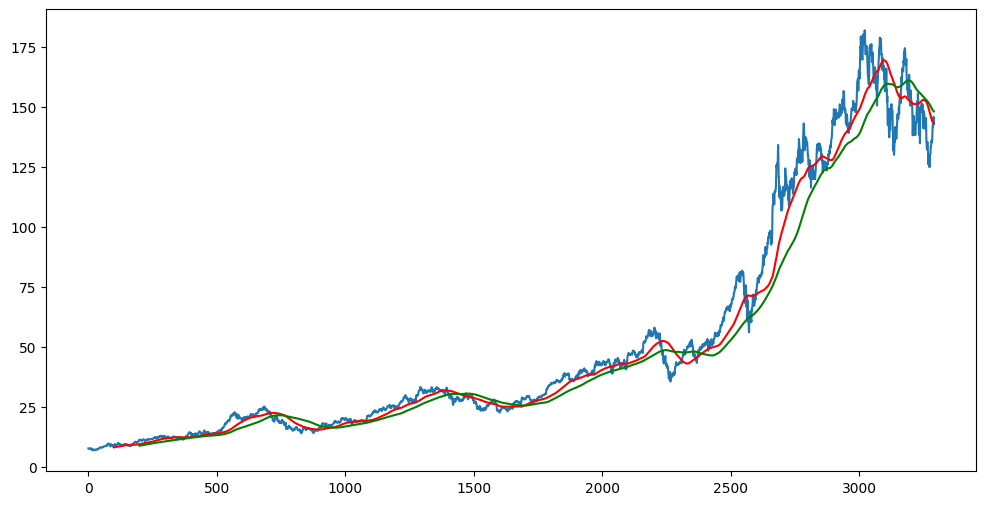

In [7]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200, 'g')

In [8]:
#splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2303, 1)
(988, 1)


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))

In [11]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.71734937],
       [0.71783807],
       [0.7204769 ]])

In [12]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [21]:

from Keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

ModuleNotFoundError: No module named 'Keras'

In [24]:
print('hello world')

hello world


In [25]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model = Sequential()
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True ))
model.add(Dropout(0,.3))

model = Sequential()
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True ))
model.add(Dropout(0.4))

model = Sequential()
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [26]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [27]:
model.build()

ValueError: You must provide an `input_shape` argument.

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (2203, 120)               58560     
                                                                 
 dropout_3 (Dropout)         (2203, 120)               0         
                                                                 
 dense (Dense)               (2203, 1)                 121       
                                                                 
Total params: 58,681
Trainable params: 58,681
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
69/69 [==============================] - 13s 116ms/step - loss: 0.0224
Epoch 2/50
69/69 [==============================] - 8s 110ms/step - loss: 0.0063
Epoch 3/50
69/69 [==============================] - 8s 115ms/step - loss: 0.0055
Epoch 4/50
69/69 [==============================] - 8s 113ms/step - loss: 0.0045
Epoch 5/50
69/69 [==============================] - 7s 108ms/step - loss: 0.0054
Epoch 6/50
69/69 [==============================] - 7s 104ms/step - loss: 0.0042
Epoch 7/50
69/69 [==============================] - 7s 105ms/step - loss: 0.0041
Epoch 8/50
69/69 [==============================] - 7s 104ms/step - loss: 0.0038
Epoch 9/50
69/69 [==============================] - 9s 132ms/step - loss: 0.0035
Epoch 10/50
69/69 [==============================] - 8s 115ms/step - loss: 0.0032
Epoch 11/50
69/69 [==============================] - 7s 106ms/step - loss: 0.0033
Epoch 12/50
69/69 [==============================] - 7s 105ms/step - loss: 0.0030
Epoch 13/50
69/69 [=====

In [34]:
model.save('keras_model.h5')

In [35]:
data_testing.head()

,Close
2303,43.287498
2304,43.742500
2305,43.962502
2306,43.882500
2307,43.630001


In [36]:
past_100_days = data_training.tail(100)

In [37]:
final_df = past_100_days.append(data_testing, ignore_index = True)

C:\Users\Naresh.DESKTOP-68JQ9DH\AppData\Local\Temp\ipykernel_3168\3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [39]:
final_df = past_100_days.append(data_testing,ignore_index=True)

C:\Users\Naresh.DESKTOP-68JQ9DH\AppData\Local\Temp\ipykernel_3168\3976939425.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index=True)


In [40]:
final_df

,Close
0,58.017502
1,56.997501
2,56.072498
3,55.942501
4,56.717499
...,...
1083,142.529999
1084,141.860001
1085,143.960007
1086,145.929993


In [41]:
final_df.head()

,Close
0,58.017502
1,56.997501
2,56.072498
3,55.942501
4,56.717499


In [43]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.15341813],
       [0.14645388],
       [0.14013825],
       ...,
       [0.74020661],
       [0.75365706],
       [0.73365199]])

In [44]:
input_data.shape

(1088, 1)

In [45]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [59]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)
print(y_test)

(988, 100, 1)
(988,)
[3.56160247e+09 3.77097406e+09 3.87220882e+09 3.83539554e+09
 3.71920692e+09 3.48682790e+09 3.53399426e+09 4.22307598e+09
 4.45430523e+09 4.54633668e+09 4.77871394e+09 5.05365677e+09
 5.27223168e+09 5.10082313e+09 5.28833705e+09 6.08555558e+09
 5.62079932e+09 5.35505980e+09 5.13073260e+09 5.32399882e+09
 5.35275854e+09 5.49425586e+09 5.64265698e+09 5.96246490e+09
 6.11546681e+09 6.15457961e+09 6.30528025e+09 6.66190145e+09
 6.59287743e+09 6.72172040e+09 6.52960570e+09 6.52040238e+09
 6.56181644e+09 6.56411771e+09 7.01046909e+09 7.09444697e+09
 7.17152281e+09 7.51088713e+09 7.47407560e+09 7.25780196e+09
 7.14506436e+09 7.18072613e+09 6.72747269e+09 7.86060628e+09
 7.70300183e+09 8.00210360e+09 7.62592600e+09 6.97940810e+09
 6.98400889e+09 6.73322499e+09 6.32598640e+09 5.00764192e+09
 5.34585648e+09 5.60584370e+09 5.50921147e+09 5.38496928e+09
 4.70508913e+09 5.10887669e+09 4.66942736e+09 4.31050664e+09
 4.23112954e+09 4.14600014e+09 4.04821816e+09 4.15405371e+09
 3.

In [47]:
#making predictions

y_predicted = model.predict(x_test)

31/31 [==============================] - 2s 46ms/step


In [48]:
y_predicted.shape

(988, 1)

In [61]:
y_test

array([3.56160247e+09, 3.77097406e+09, 3.87220882e+09, 3.83539554e+09,
       3.71920692e+09, 3.48682790e+09, 3.53399426e+09, 4.22307598e+09,
       4.45430523e+09, 4.54633668e+09, 4.77871394e+09, 5.05365677e+09,
       5.27223168e+09, 5.10082313e+09, 5.28833705e+09, 6.08555558e+09,
       5.62079932e+09, 5.35505980e+09, 5.13073260e+09, 5.32399882e+09,
       5.35275854e+09, 5.49425586e+09, 5.64265698e+09, 5.96246490e+09,
       6.11546681e+09, 6.15457961e+09, 6.30528025e+09, 6.66190145e+09,
       6.59287743e+09, 6.72172040e+09, 6.52960570e+09, 6.52040238e+09,
       6.56181644e+09, 6.56411771e+09, 7.01046909e+09, 7.09444697e+09,
       7.17152281e+09, 7.51088713e+09, 7.47407560e+09, 7.25780196e+09,
       7.14506436e+09, 7.18072613e+09, 6.72747269e+09, 7.86060628e+09,
       7.70300183e+09, 8.00210360e+09, 7.62592600e+09, 6.97940810e+09,
       6.98400889e+09, 6.73322499e+09, 6.32598640e+09, 5.00764192e+09,
       5.34585648e+09, 5.60584370e+09, 5.50921147e+09, 5.38496928e+09,
      

In [63]:
y_predicted.shape
y_predicted

array([[5.0178161e+09],
       [5.0411023e+09],
       [5.0854292e+09],
       [5.1343836e+09],
       [5.1731046e+09],
       [5.1939287e+09],
       [5.1848044e+09],
       [5.1803510e+09],
       [5.2527590e+09],
       [5.3418388e+09],
       [5.4344100e+09],
       [5.5461350e+09],
       [5.6786790e+09],
       [5.8232801e+09],
       [5.9344082e+09],
       [6.0559232e+09],
       [6.2527759e+09],
       [6.3748823e+09],
       [6.4561536e+09],
       [6.5005322e+09],
       [6.5569152e+09],
       [6.6048000e+09],
       [6.6597724e+09],
       [6.7224274e+09],
       [6.8122429e+09],
       [6.9084800e+09],
       [6.9991199e+09],
       [7.0970460e+09],
       [7.2236349e+09],
       [7.3287455e+09],
       [7.4374589e+09],
       [7.5122437e+09],
       [7.5766282e+09],
       [7.6356460e+09],
       [7.6855567e+09],
       [7.7766323e+09],
       [7.8651044e+09],
       [7.9527352e+09],
       [8.0679373e+09],
       [8.1665044e+09],
       [8.2313364e+09],
       [8.275656

In [51]:
scaler.scale_

array([0.00682769])

In [58]:
scale_factor = 1 / 0.00682769
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor
print(y_predicted)

[[5.0178161e+09]
 [5.0411023e+09]
 [5.0854292e+09]
 [5.1343836e+09]
 [5.1731046e+09]
 [5.1939287e+09]
 [5.1848044e+09]
 [5.1803510e+09]
 [5.2527590e+09]
 [5.3418388e+09]
 [5.4344100e+09]
 [5.5461350e+09]
 [5.6786790e+09]
 [5.8232801e+09]
 [5.9344082e+09]
 [6.0559232e+09]
 [6.2527759e+09]
 [6.3748823e+09]
 [6.4561536e+09]
 [6.5005322e+09]
 [6.5569152e+09]
 [6.6048000e+09]
 [6.6597724e+09]
 [6.7224274e+09]
 [6.8122429e+09]
 [6.9084800e+09]
 [6.9991199e+09]
 [7.0970460e+09]
 [7.2236349e+09]
 [7.3287455e+09]
 [7.4374589e+09]
 [7.5122437e+09]
 [7.5766282e+09]
 [7.6356460e+09]
 [7.6855567e+09]
 [7.7766323e+09]
 [7.8651044e+09]
 [7.9527352e+09]
 [8.0679373e+09]
 [8.1665044e+09]
 [8.2313364e+09]
 [8.2756562e+09]
 [8.3160668e+09]
 [8.2991780e+09]
 [8.4043254e+09]
 [8.4777288e+09]
 [8.5782656e+09]
 [8.6278646e+09]
 [8.6022738e+09]
 [8.5764413e+09]
 [8.5201039e+09]
 [8.4205563e+09]
 [8.1814810e+09]
 [7.9975542e+09]
 [7.8520412e+09]
 [7.7081231e+09]
 [7.5662833e+09]
 [7.3649654e+09]
 [7.2312105e+0

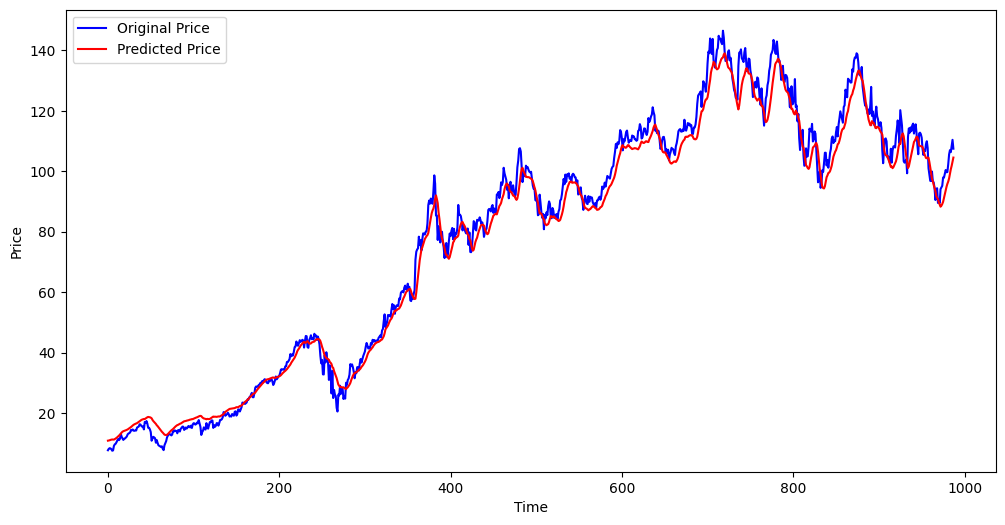

In [54]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()